## Exploratory Data Analysis on Craiglist Housing Data in New York and San Francisco:

### 1. Loading in the packages and reading data in from the database:

In [36]:
import os
import pandas as pd
import numpy as np
from craigslist import CraigslistHousing #this is a modified version that extracts more info
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sqlite3

sns.set_style("darkgrid", {"axes.facecolor": ".95"})

matplotlib.rcParams['figure.figsize'] = (17.0, 12.0)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [37]:
import sys
sys.path.insert(0, '/Users/alexpapiu/Documents/Craiglist_Project')
import cl_pipeline

In [38]:
os.chdir("/Users/alexpapiu/Documents/Data/Craigslist")
conn = sqlite3.connect("housing.db")
data = pd.read_sql_query("select * from cl_housing", con = conn).drop_duplicates()

In [39]:
data.head()

,id,datetime,geotag,has_image,has_map,id.1,name,num_bed,price,sq_feet,url,where,area
0,5774898506,2016-09-10 04:06,None,0,0,5.774899e+09,Very large apt Stunning ?Luxury 3 Bedroom,3.0,$1670,NaN,http://newyork.craigslist.org/brk/abo/57748985...,?Flatbush,newyorkbrk
1,5774903240,2016-09-10 03:58,None,0,0,5.774903e+09,Super Awesome two br ?Heat Incl apartment for ...,NaN,$1182,NaN,http://newyork.craigslist.org/brk/abo/57749032...,?Williamsburg,newyorkbrk
2,5774900841,2016-09-10 03:54,None,0,0,5.774901e+09,? looking for roommate :) sunny new apt in wil...,3.0,$1400,NaN,http://newyork.craigslist.org/brk/abo/57749008...,? Williamsburg,newyorkbrk
3,5774904496,2016-09-10 03:37,None,0,0,5.774904e+09,VERY AFFORDABLE? ROOM/APT. READY TO MOVE IN!,3.0,$1600,NaN,http://newyork.craigslist.org/brk/abo/57749044...,? New York,newyorkbrk
4,5774901867,2016-09-10 03:33,None,0,0,5.774902e+09,stunning two bedroom? ? wood floors wood kitchen,2.0,$1176,NaN,http://newyork.craigslist.org/brk/abo/57749018...,? Clinton Hills?,newyorkbrk


In [40]:
data["area"].unique()

array(['newyorkbrk', 'newyorkmnh', 'sfbaysfc'], dtype=object)

In [41]:
data["where"].value_counts()

Upper East Side                           3581
SOMA / south beach                        2248
Bushwick                                  2029
Upper West Side                           1458
East Village                              1438
Murray Hill                               1319
Midtown West                              1213
Williamsburg                              1155
Midtown East                               995
pacific heights                            970
nob hill                                   901
lower nob hill                             876
Crown Heights                              801
mission district                           746
East Harlem                                740
Harlem / Morningside                       727
marina / cow hollow                        717
West Village                               688
Chelsea                                    682
Inwood / Wash Hts                          679
downtown / civic / van ness                646
russian hill 

In [43]:
data.dtypes

id             int64
datetime      object
geotag        object
has_image      int64
has_map        int64
id.1         float64
name          object
num_bed      float64
price         object
sq_feet      float64
url           object
where         object
area          object
dtype: object

### Cleaning Data:

In [44]:
data = cl_pipeline.clean_data(data)

In [45]:
data["where"] = (data["where"].str.replace(r"[^\w\s-]", " ")
                              .str.replace(" +", " ")
                              .str.strip())

In [46]:
data.head()

,id,datetime,geotag,has_image,has_map,name,num_bed,price,sq_feet,url,where,area,dayofweek,hour,int_bed,per_person
0,5774898506,2016-09-10 04:06:00,None,0,0,very large apt stunning ?luxury 3 bedroom,3,1670.0,NaN,http://newyork.craigslist.org/brk/abo/57748985...,flatbush,Brooklyn,5,4,3.0,556.666667
1,5774903240,2016-09-10 03:58:00,None,0,0,super awesome two br ?heat incl apartment for ...,NaN,1182.0,NaN,http://newyork.craigslist.org/brk/abo/57749032...,williamsburg,Brooklyn,5,3,NaN,NaN
2,5774900841,2016-09-10 03:54:00,None,0,0,? looking for roommate :) sunny new apt in wil...,3,1400.0,NaN,http://newyork.craigslist.org/brk/abo/57749008...,williamsburg,Brooklyn,5,3,3.0,466.666667
3,5774904496,2016-09-10 03:37:00,None,0,0,very affordable? room apt. ready to move in!,3,1600.0,NaN,http://newyork.craigslist.org/brk/abo/57749044...,new york,Brooklyn,5,3,3.0,533.333333
4,5774901867,2016-09-10 03:33:00,None,0,0,stunning two bedroom? ? wood floors wood kitchen,2,1176.0,NaN,http://newyork.craigslist.org/brk/abo/57749018...,clinton hills,Brooklyn,5,3,2.0,588.000000


In [47]:
data.dtypes

id                     int64
datetime      datetime64[ns]
geotag                object
has_image              int64
has_map                int64
name                  object
num_bed               object
price                float64
sq_feet              float64
url                   object
where                 object
area                  object
dayofweek              int64
hour                   int64
int_bed              float64
per_person           float64
dtype: object

In [22]:
data.shape

(57252, 16)

In [23]:
data.to_sql("cl_housing_clean", conn, index = False, if_exists="replace")

## Exploratory Data Analysis:

### What are the neighborhoods with the most listings?

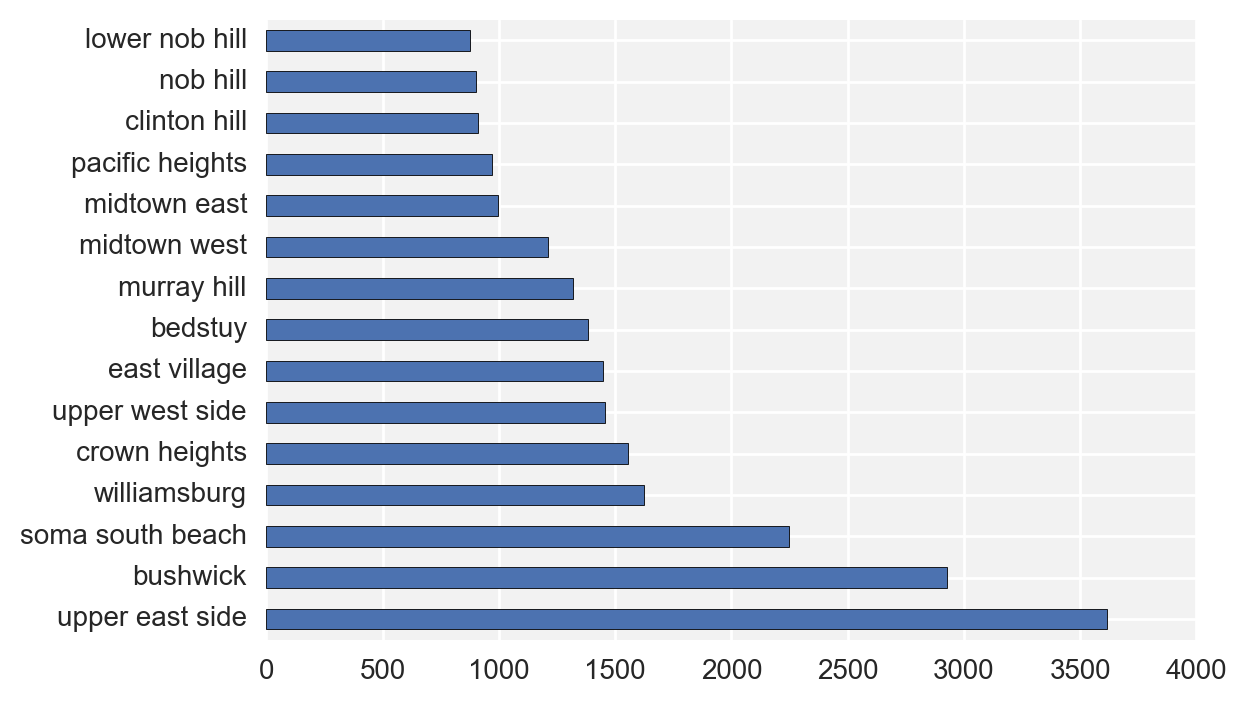

In [24]:
data["where"].value_counts()[:15].plot(kind = "barh")

### Median Rent per Bedroom:

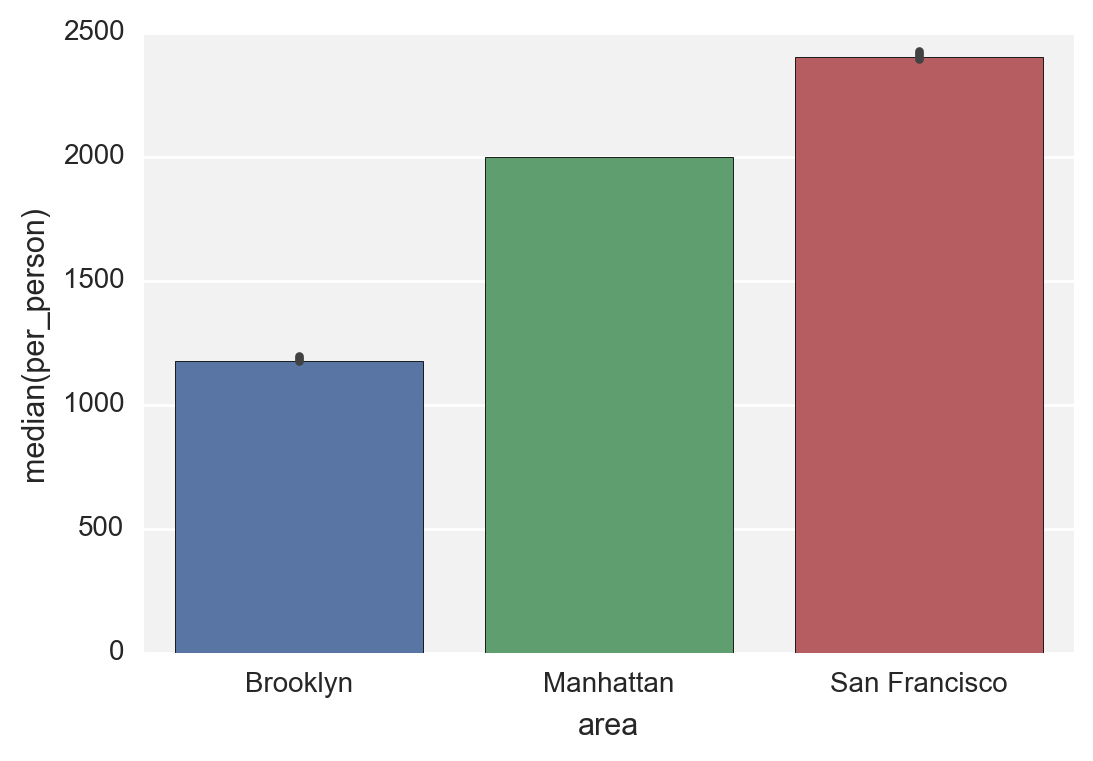

In [25]:
sns.barplot(x = "area", y = "per_person", data = data, estimator = np.median)

### Median Rent for one Bedroom:

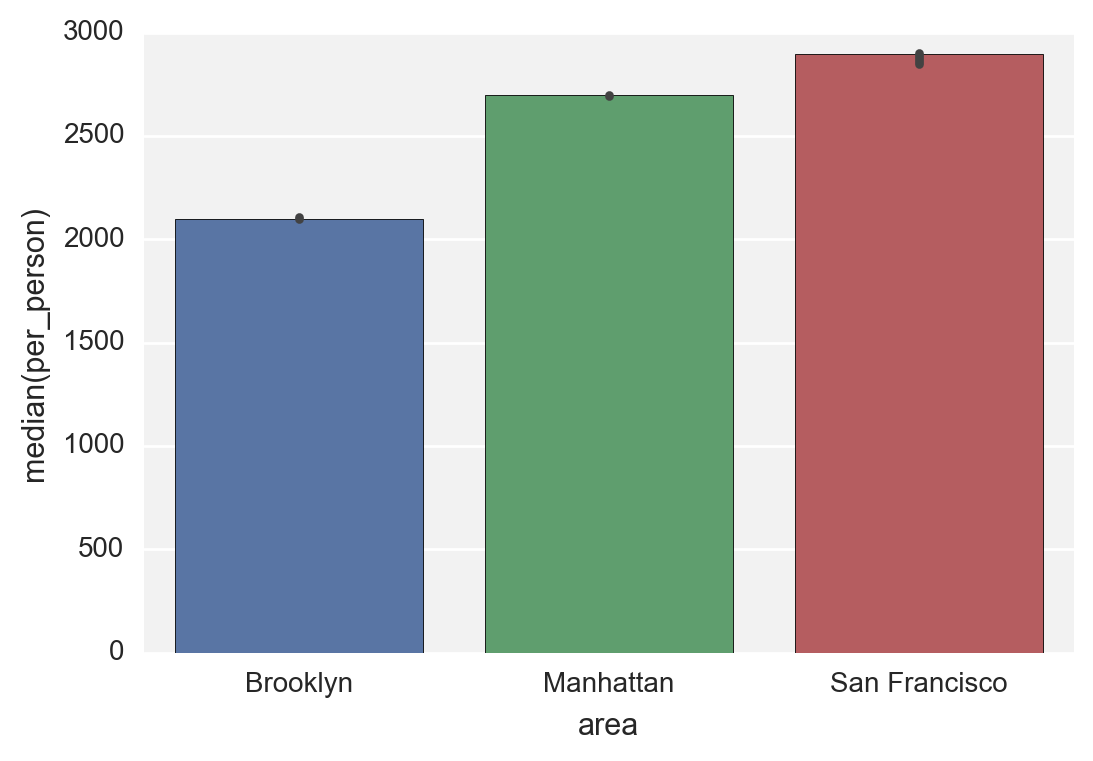

In [26]:
sns.barplot(x = "area", y = "per_person", data = data[data.int_bed == 1], estimator = np.median)

### Median Rent Per Person by Number of Bedrooms:

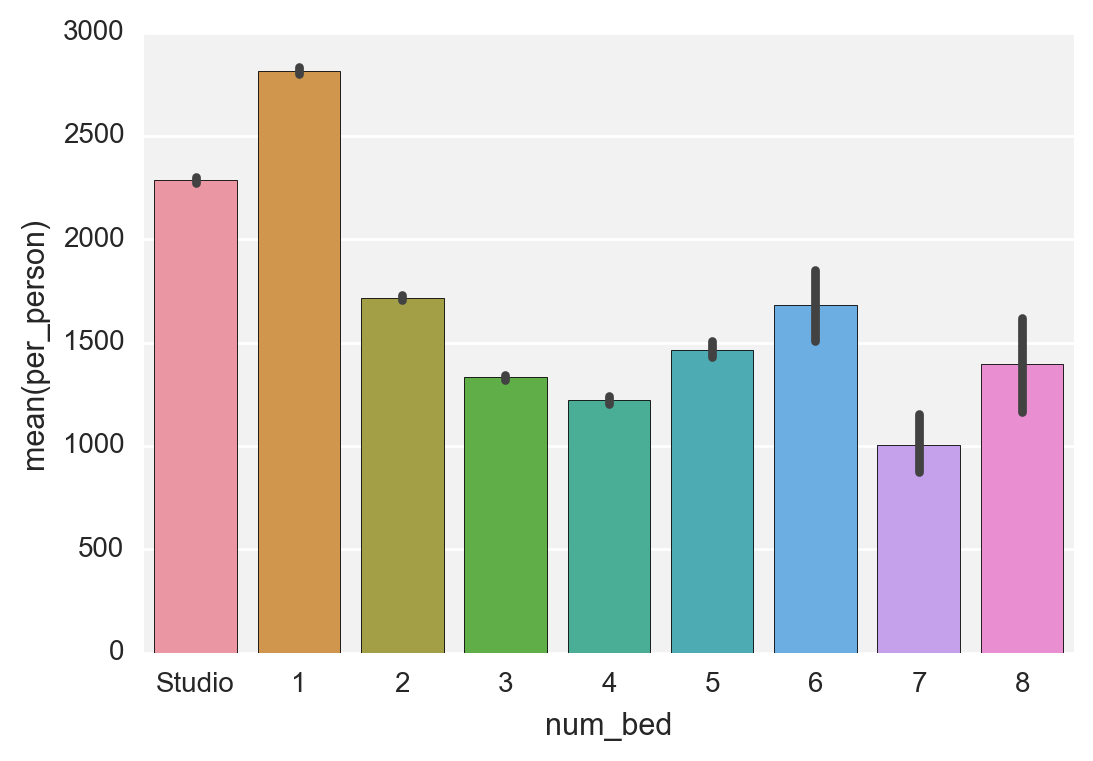

In [27]:
sns.barplot(x = "num_bed", y = "per_person", data = data, estimator = np.mean, n_boot = 1000,
           order = ["Studio", 1, 2, 3, 4, 5, 6, 7, 8])

In [28]:
data.groupby(["num_bed", "area"])["num_bed"].count()

num_bed  area         
1.0      Brooklyn         3794
         Manhattan        5529
         San Francisco    5888
2.0      Brooklyn         7758
         Manhattan        4779
         San Francisco    5337
3.0      Brooklyn         6566
         Manhattan        2991
         San Francisco    2017
4.0      Brooklyn         2137
         Manhattan        1245
         San Francisco     587
5.0      Brooklyn          316
         Manhattan         463
         San Francisco     183
6.0      Brooklyn           40
         Manhattan          33
         San Francisco      40
7.0      Brooklyn           41
         Manhattan           4
         San Francisco       7
8.0      Brooklyn            2
         Manhattan           1
         San Francisco      18
Studio   Brooklyn          834
         Manhattan        2196
         San Francisco    2004
Name: num_bed, dtype: int64

Hmm why does a 5 bedroom cost more than a 4 bedrooom per person?

### Histogram of Rent Per Person:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c52c780>]], dtype=object)

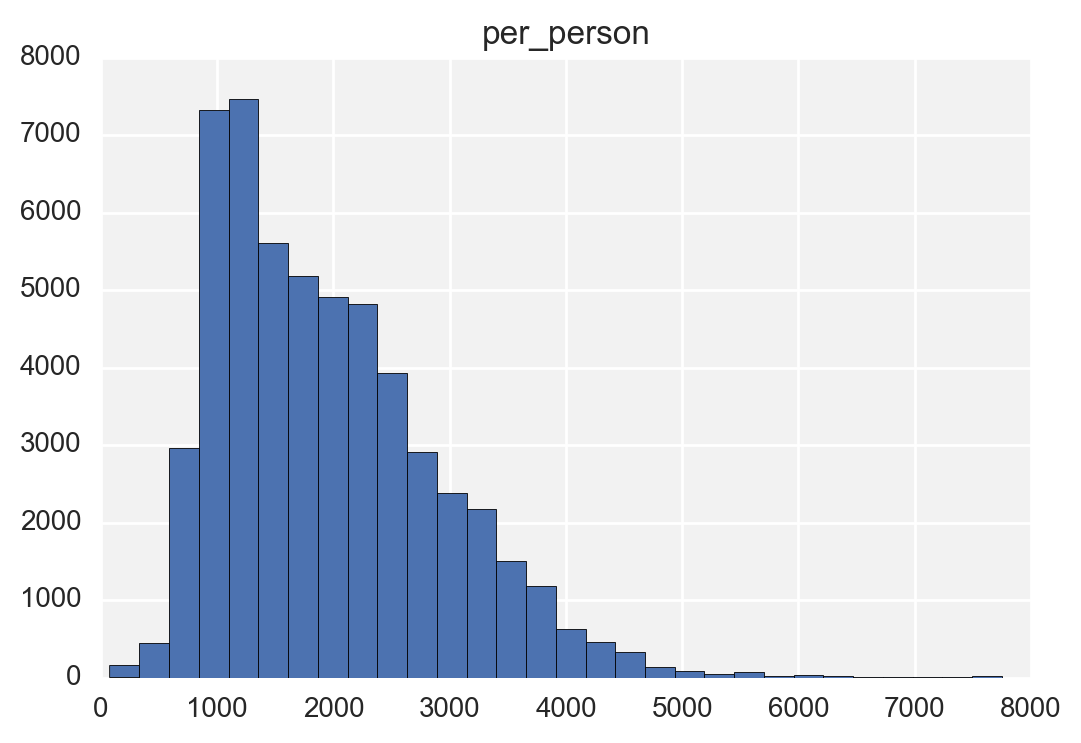

In [29]:
data.query("per_person < 8000").hist("per_person", bins = 30)

In [30]:
#data.query("per_person < 8000").hist("per_person", bins = 30, by = "area")

### Histogram of Rent Per Person by City:

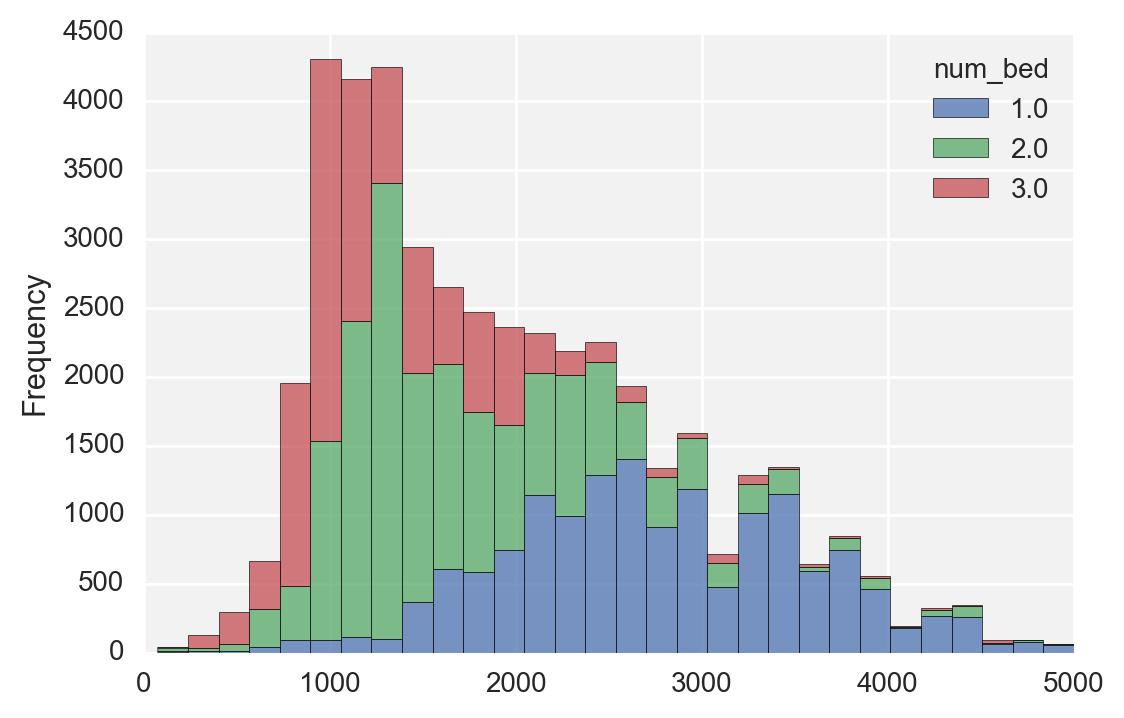

In [31]:
(data[data["num_bed"].isin([1, 2, 3])].query("per_person < 5000")[["num_bed", "per_person"]]
     .pivot(columns = "num_bed", values = "per_person")
     .plot.hist(alpha = 0.75, bins = 30, stacked = True))

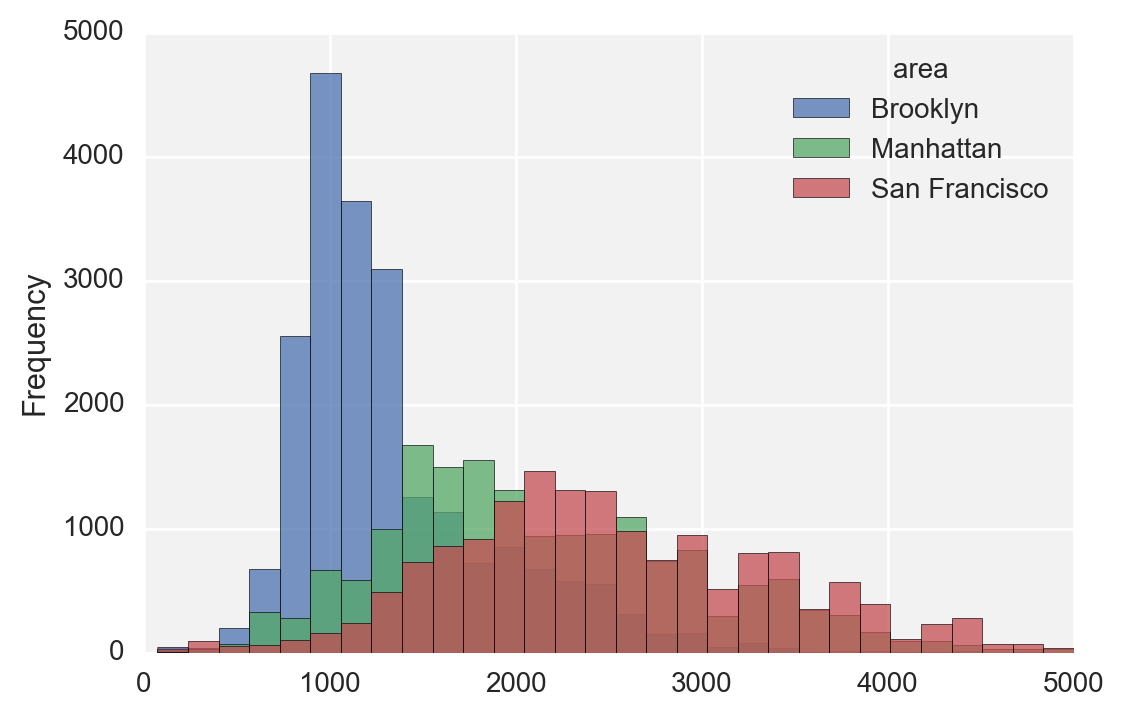

In [32]:
(data.query("per_person < 5000")[["area", "per_person"]]
     .pivot(columns = "area", values = "per_person")
     .plot.hist(alpha = 0.75, bins = 30, stacked = False, by = "area"))

So if you want something under 1200 Brooklyn is probably your best best.

### How does Square Footage come into play?

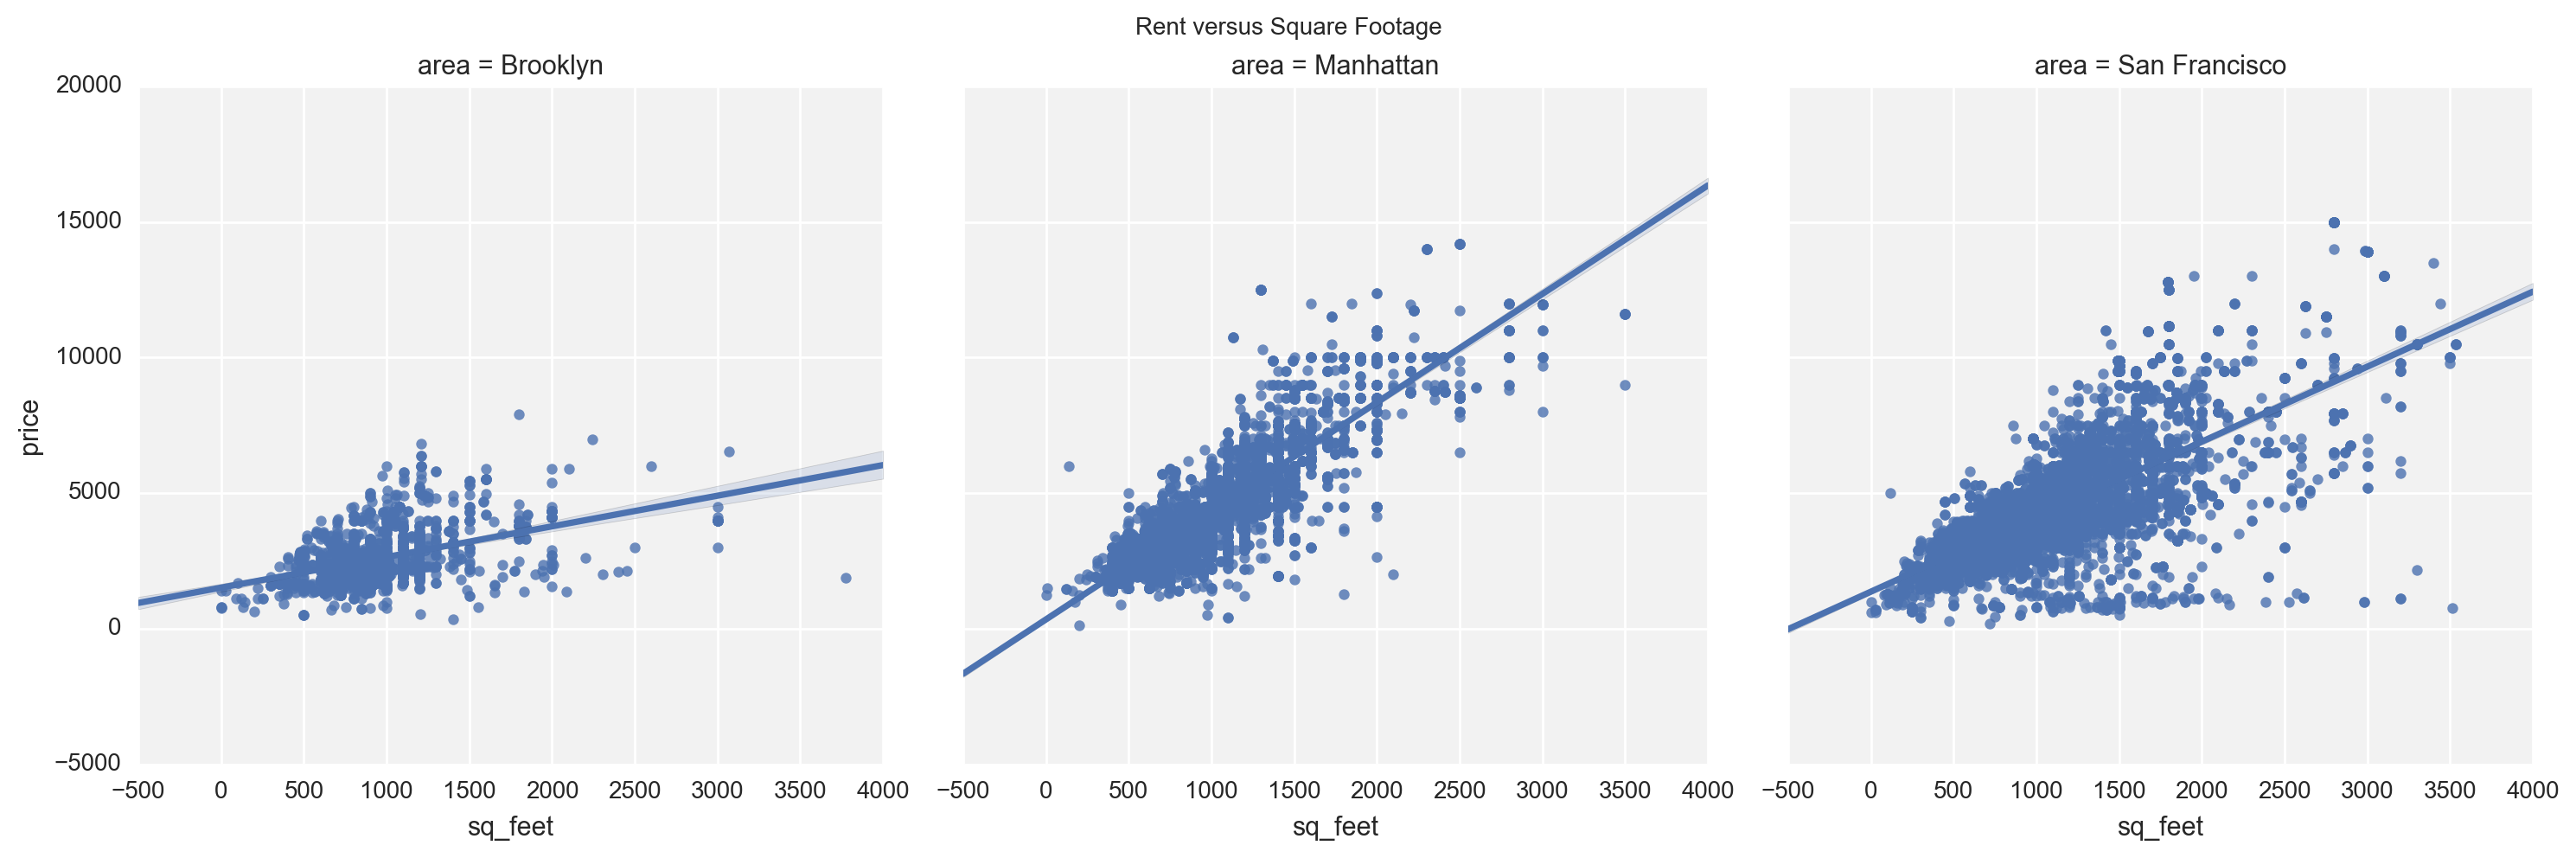

In [33]:
g = sns.lmplot(x = "sq_feet", y = "price",
           data=data.query("sq_feet < 4000 & price < 15000"),
           col = "area", fit_reg=True)


plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rent versus Square Footage')

### Rent by Area:

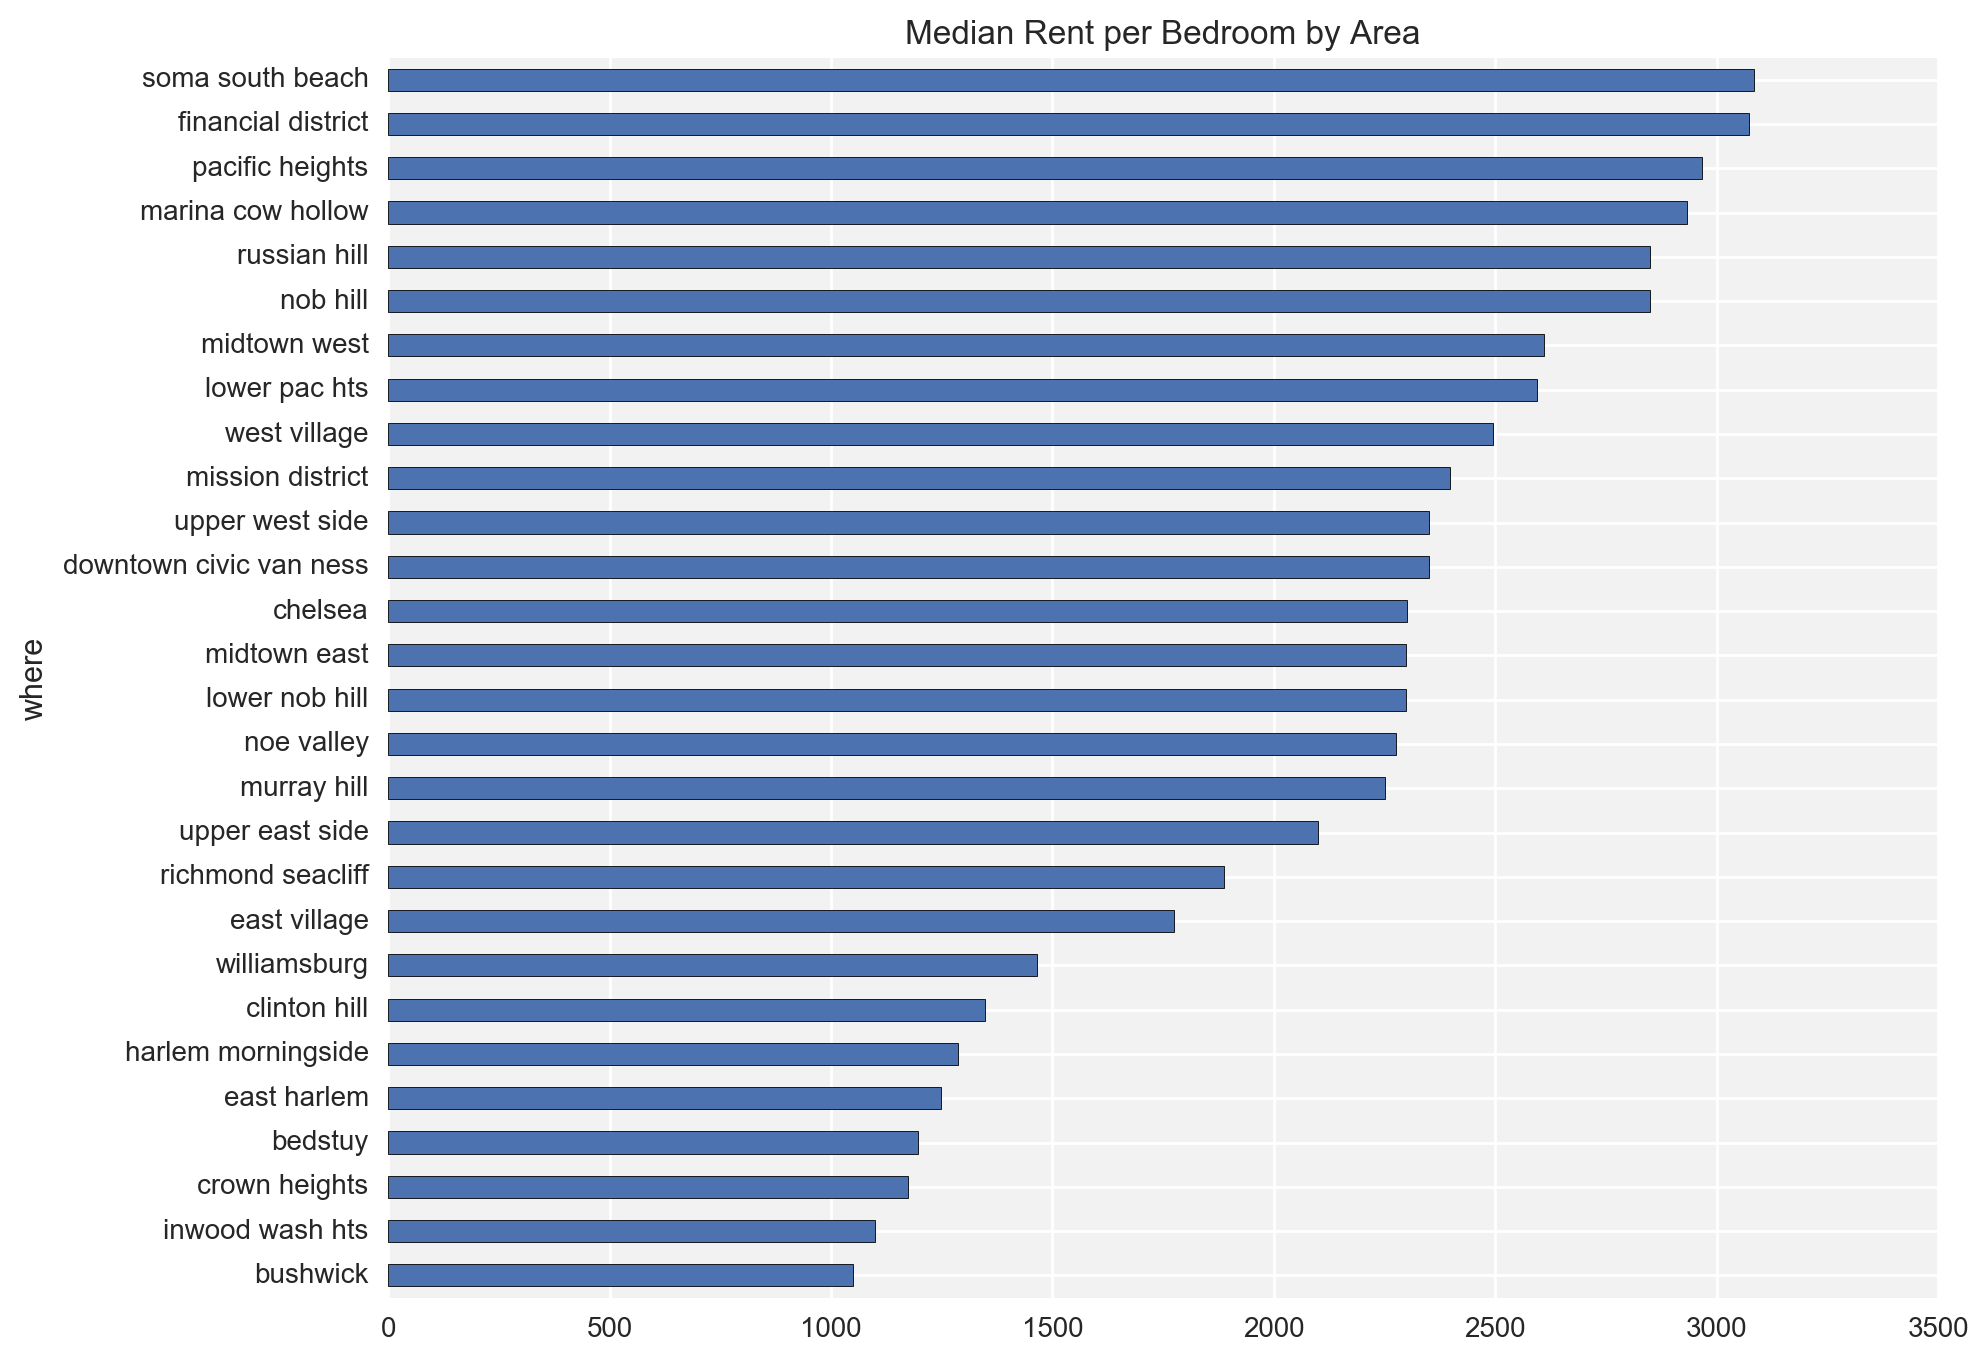

In [34]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

price_by_locations = (data.groupby("where")["per_person"]
                          .aggregate(["median", "count"])
                          .query("count > 500")
                          .sort_values("median"))
price_by_locations["median"].plot.barh(title = "Median Rent per Bedroom by Area")

### For a 2 bedroom?

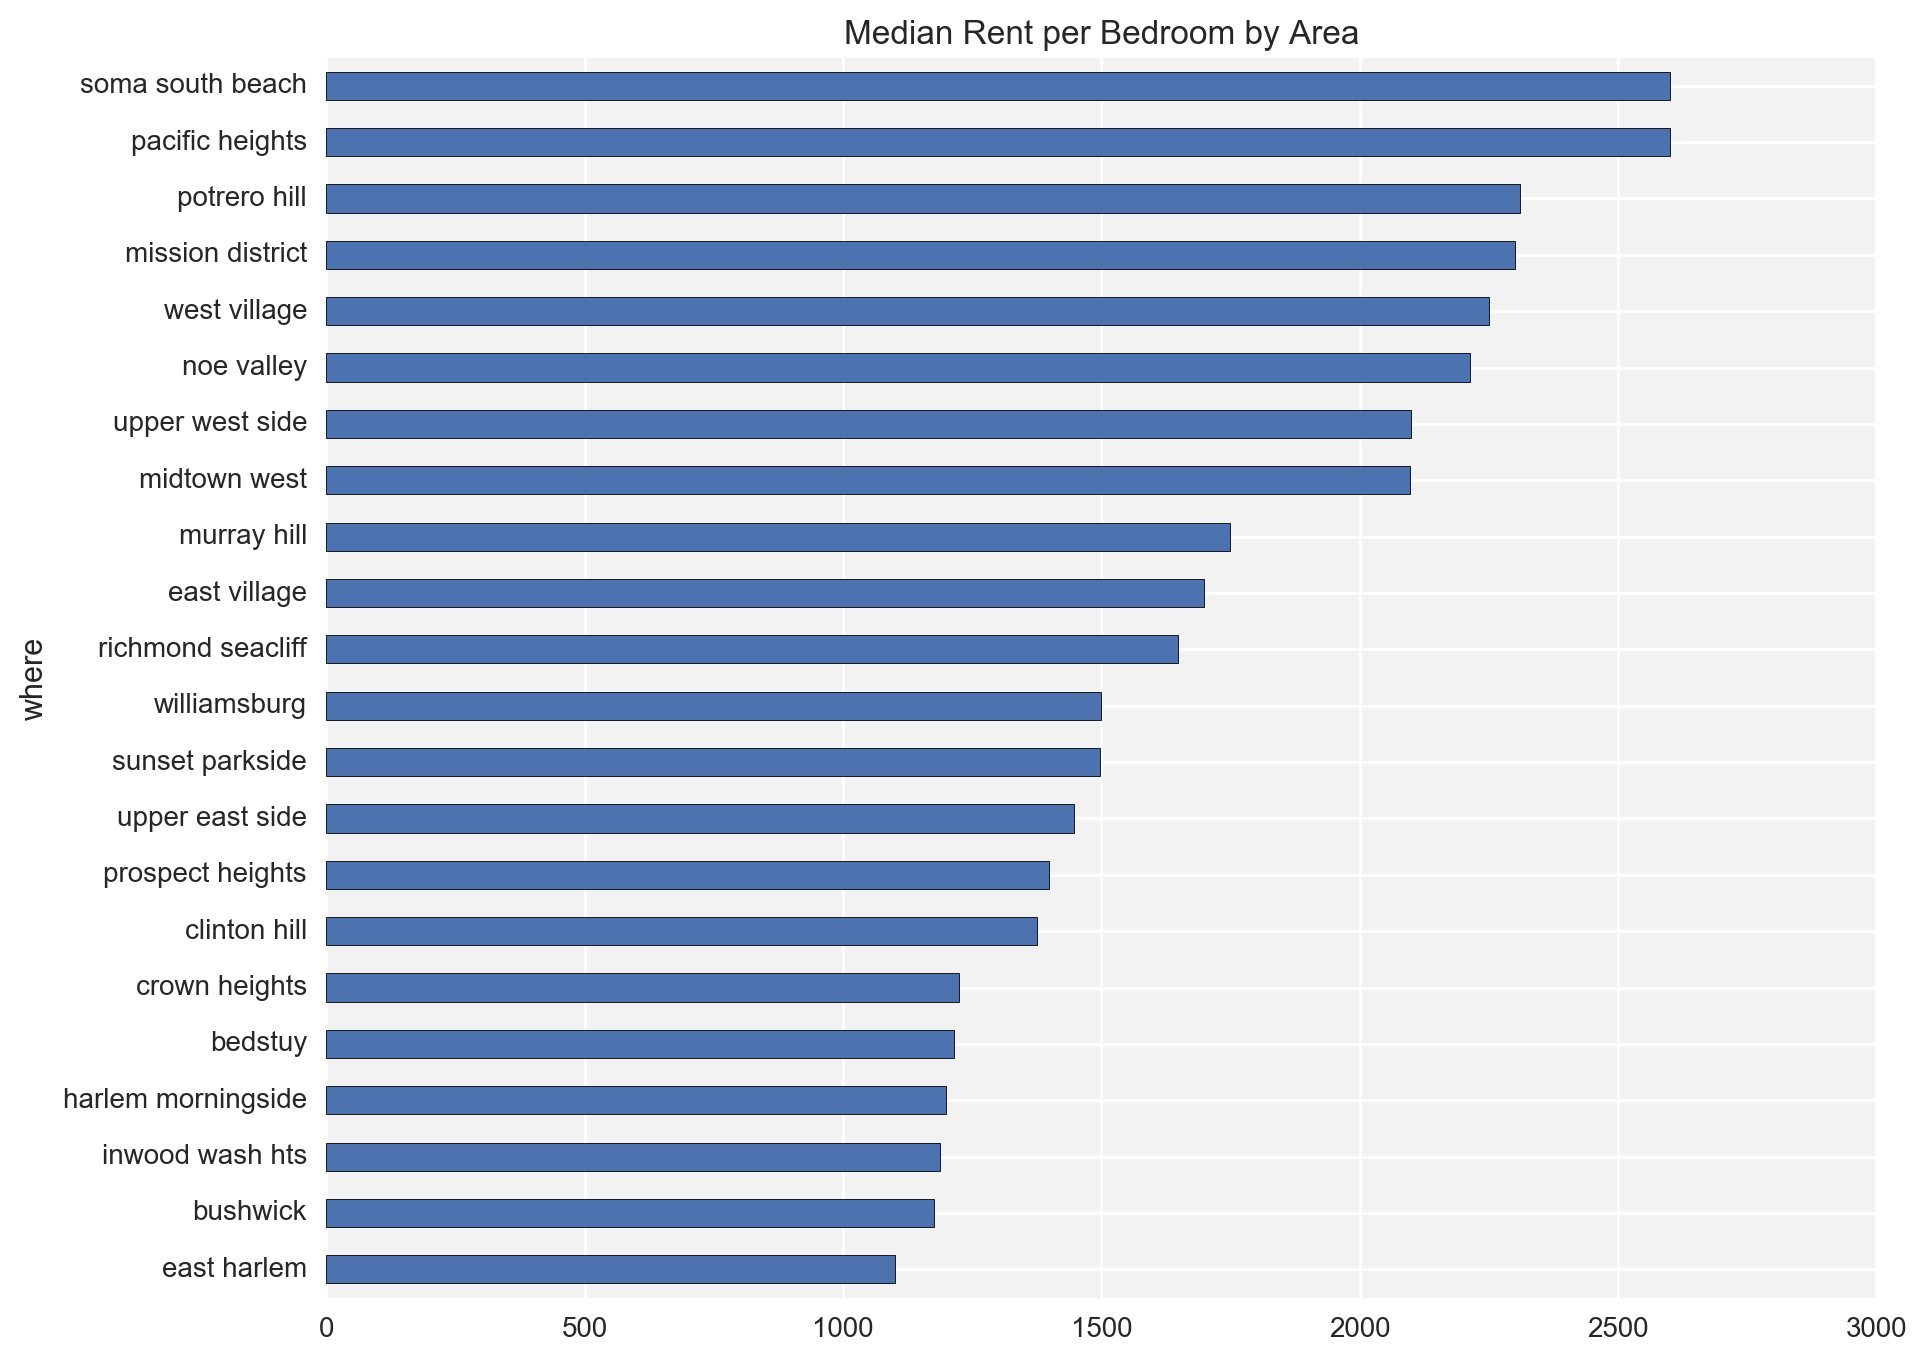

In [35]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

price_by_locations = (data.query("int_bed == 2").groupby("where")["per_person"]
                          .aggregate(["median", "count"])
                          .query("count > 200")
                          .sort_values("median"))
price_by_locations["median"].plot.barh(title = "Median Rent per Bedroom by Area")